In [33]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


# Installing important libraries

In [34]:
!pip install  PyWavelets==0.5.2
!pip install opencv-python
!pip install seaborn==0.8.

  Using cached PyWavelets-0.5.2.tar.gz (4.4 MB)
  Running setup.py clean for PyWavelets
Failed to build PyWavelets
  Attempting uninstall: PyWavelets
    Found existing installation: pywavelets 1.1.1
    Uninstalling pywavelets-1.1.1:
      Successfully uninstalled pywavelets-1.1.1
    Running setup.py install for PyWavelets: started
    Running setup.py install for PyWavelets: finished with status 'error'
  Rolling back uninstall of pywavelets
  Moving to c:\users\msi1\anaconda3\lib\site-packages\pywavelets-1.1.1.dist-info\
   from C:\Users\msi1\anaconda3\Lib\site-packages\~ywavelets-1.1.1.dist-info

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\msi1\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\msi1\\AppData\\Local\\Temp\\pip-install-m1m5j0ld\\pywavelets_9c888e5651d340edbf1bd6e16416d72f\\setup.py'"'"'; __file__='"'"'C:\\Users\\msi1\\AppData\\Local\\Temp\\pip-install-m1m5j0ld\\pywavelets_9c888e5651d340edbf1bd6e16416d72f\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\msi1\AppData\Local\Temp\pip-wheel-2fmtrjpa'
       cwd: C:\Users\msi1\AppData\Local\Temp\pip-install-m1m5j0ld\pywavelets_9c888e5651d340edbf1bd6e16416d72f\
  Complete output (55 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\pywt
  copying pywt\version.py -> build\lib.win-amd64-3.8\pywt
  copying


  Moving to c:\users\msi1\anaconda3\lib\site-packages\pywt\
   from C:\Users\msi1\anaconda3\Lib\site-packages\~ywt


  ERROR: Failed building wheel for PyWavelets
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\msi1\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\msi1\\AppData\\Local\\Temp\\pip-install-m1m5j0ld\\pywavelets_9c888e5651d340edbf1bd6e16416d72f\\setup.py'"'"'; __file__='"'"'C:\\Users\\msi1\\AppData\\Local\\Temp\\pip-install-m1m5j0ld\\pywavelets_9c888e5651d340edbf1bd6e16416d72f\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\msi1\AppData\Local\Temp\pip-record-sq0zkyv4\install-record.txt' --single-version-externally-managed --compile --install-headers 'C:\Users\msi1\anaconda3\Include\PyWavelets'
         cwd: C:\Users\msi1\AppData\Local\Temp\pip-install-m1m5j0ld\pywavelets_9c888e5651d340edbf1bd6e16416d72f\
    Complete output (55 lines):
    running install
    running

In [43]:
import cv2 

In [44]:
path='ViratKohli.jpg'
img =cv2.imread(path)
assert not isinstance(img,type(None)), 'image not found'

In [45]:
img.shape #RGB values(R,G,B)

(192, 192, 3)

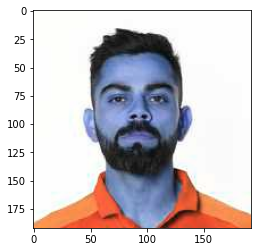

In [46]:
plt.imshow(img)

In [47]:
gray_img =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#removes the third dimension and gives a gray image
gray_img.shape

(192, 192)

In [48]:
gray_img


array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [158, 150, 142, ..., 124, 124, 124],
       [155, 150, 142, ..., 123, 123, 122],
       [143, 143, 143, ..., 123, 122, 122]], dtype=uint8)

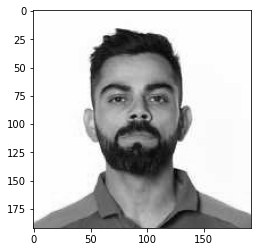

In [49]:
plt.imshow(gray_img,cmap='gray')
#for gray image

# USE HARCASCADE FROM OPENCV TO DETECT

In [50]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
faces
#number of arrays = number of faces
#returns 4 values(x,y,width,height)

array([[44, 36, 98, 98]])

Detecting Faces

In [51]:
(x,y,w,h)=faces[0]

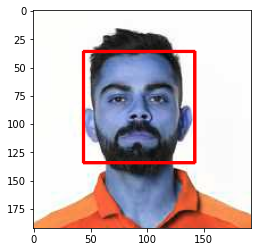

In [52]:
#now to detect a face using red rectangle
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)#(255,0,0) means red rectangle
plt.imshow(face_img)

Detecting Eyes

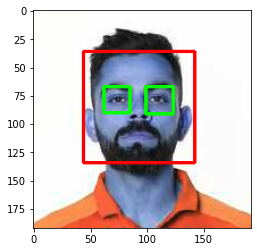

In [53]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray_img =gray_img[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+h]
    eyes= eye_cascade.detectMultiScale(roi_gray_img)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)#RGB "G"
plt.figure()
plt.imshow(face_img,cmap="gray")
plt.show()

For getting cropped image

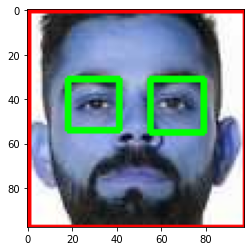

In [54]:
%matplotlib inline
plt.imshow(roi_color,cmap="gray")

In [72]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

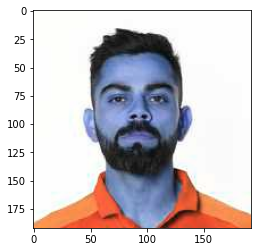

In [73]:
original_image = cv2.imread('ViratKohli.jpg')
plt.imshow(original_image)

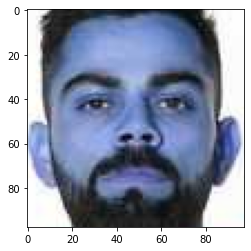

In [74]:
cropped_image = get_cropped_image_if_2_eyes('ViratKohli.jpg')
plt.imshow(cropped_image)

In [75]:
path_to_data = "./Downloads/image_dataset"
path_to_cr_data = "./Downloads/image_dataset/cropped"

In [76]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [77]:
img_dirs

['./Downloads/image_dataset\\lionel_messi',
 './Downloads/image_dataset\\maria_sharapova',
 './Downloads/image_dataset\\roger_federer',
 './Downloads/image_dataset\\serena_williams',
 './Downloads/image_dataset\\virat_kohli']

In [78]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [79]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

lionel_messi
Generating cropped images in folder:  ./Downloads/image_dataset/croppedlionel_messi
maria_sharapova
Generating cropped images in folder:  ./Downloads/image_dataset/croppedmaria_sharapova
roger_federer
Generating cropped images in folder:  ./Downloads/image_dataset/croppedroger_federer
serena_williams
Generating cropped images in folder:  ./Downloads/image_dataset/croppedserena_williams
virat_kohli
Generating cropped images in folder:  ./Downloads/image_dataset/croppedvirat_kohli


In [80]:
cropped_img = np.array(roi_color)
cropped_img.shape

(98, 98, 3)

# Wavelet transform

Uses signal processing to detect high frequency point in or a low frequency point in an image

In [81]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

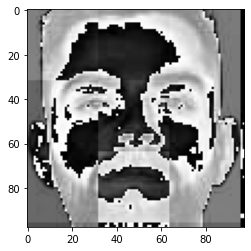

In [82]:

im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [83]:
#assigning numbers to names to append them to list
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [84]:
celebrity_file_names_dict

{'lionel_messi': ['./Downloads/image_dataset/croppedlionel_messi/lionel_messi1.png',
  './Downloads/image_dataset/croppedlionel_messi/lionel_messi2.png',
  './Downloads/image_dataset/croppedlionel_messi/lionel_messi3.png',
  './Downloads/image_dataset/croppedlionel_messi/lionel_messi4.png',
  './Downloads/image_dataset/croppedlionel_messi/lionel_messi5.png',
  './Downloads/image_dataset/croppedlionel_messi/lionel_messi6.png',
  './Downloads/image_dataset/croppedlionel_messi/lionel_messi7.png',
  './Downloads/image_dataset/croppedlionel_messi/lionel_messi8.png',
  './Downloads/image_dataset/croppedlionel_messi/lionel_messi9.png',
  './Downloads/image_dataset/croppedlionel_messi/lionel_messi10.png',
  './Downloads/image_dataset/croppedlionel_messi/lionel_messi11.png',
  './Downloads/image_dataset/croppedlionel_messi/lionel_messi12.png',
  './Downloads/image_dataset/croppedlionel_messi/lionel_messi13.png',
  './Downloads/image_dataset/croppedlionel_messi/lionel_messi14.png',
  './Download

In [85]:
X = []
y = []
#making a function to vertically stack them
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        #loading orignal image
        img=cv2.imread(training_image)
        if img is None:
            continue
        #scaling the image as they can be of different sizes
        scalled_raw_img=cv2.resize(img,(32,32))
        #loading wavelet image
        img_har=w2d(img,'db1',5)
        scalled_har_img=cv2.resize(img_har,(32,32))
        #for stacking them vertically
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_har_img.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
        

In [86]:
X

[array([[100],
        [129],
        [140],
        ...,
        [237],
        [234],
        [232]], dtype=uint8),
 array([[ 90],
        [ 66],
        [ 67],
        ...,
        [ 36],
        [247],
        [ 23]], dtype=uint8),
 array([[42],
        [44],
        [51],
        ...,
        [ 4],
        [55],
        [ 5]], dtype=uint8),
 array([[ 63],
        [ 63],
        [ 67],
        ...,
        [  2],
        [194],
        [  4]], dtype=uint8),
 array([[194],
        [128],
        [126],
        ...,
        [ 30],
        [254],
        [253]], dtype=uint8),
 array([[29],
        [34],
        [33],
        ...,
        [ 3],
        [ 0],
        [ 0]], dtype=uint8),
 array([[126],
        [130],
        [125],
        ...,
        [247],
        [ 10],
        [232]], dtype=uint8),
 array([[  9],
        [ 16],
        [ 15],
        ...,
        [253],
        [140],
        [  1]], dtype=uint8),
 array([[ 11],
        [  6],
        [  7],
        ...,
        [2

Converting x to float as skitlearn libs give warning with int


In [87]:
X=np.array(X).reshape(len(X),4096).astype(float)  #(32*32*3=4096)
X.shape

(186, 4096)

# Model Training

In [88]:
#importing important libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report 

In [89]:
X_test,X_train,y_test,y_train = train_test_split(X,y,random_state=0)
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel ='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.5827338129496403

In [90]:
len(X_test)

139

In [91]:
#CLASSIFICATION_REPORT : predicts X_test and compares with y
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.51      0.69      0.59        29
           1       0.81      0.48      0.60        27
           2       0.57      0.17      0.26        24
           3       0.52      0.64      0.57        25
           4       0.61      0.82      0.70        34

    accuracy                           0.58       139
   macro avg       0.60      0.56      0.54       139
weighted avg       0.61      0.58      0.56       139



# Now use GridSearchCv to set the best model 

In [92]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

Selecting the best model 

In [93]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [94]:
scores=[]
best_estimators ={}
import pandas as pd
for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp["params"],cv=4,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':algo,
        "best_score":clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.640152,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.615530,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.683712,{'logisticregression__C': 1}


In [95]:
best_estimators['svm'].score(X_test,y_test)

0.6330935251798561

In [96]:
best_estimators['random_forest'].score(X_test,y_test)

0.5323741007194245

In [97]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6762589928057554

In [98]:
best_clf = best_estimators['logistic_regression']

In [99]:
#creating a confusion matrix to get a better view of the situation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[21,  1,  2,  4,  1],
       [ 0, 24,  0,  3,  0],
       [ 1,  3, 11,  9,  0],
       [ 2,  5,  1, 17,  0],
       [ 4,  4,  3,  2, 21]], dtype=int64)

In [ ]:
!pip3 uninstall seaborn
!pip3 install seaborn

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Saving the model

In [ ]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

# Save class Dictionary

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))